## Importing Libraries

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Loading Data

In [217]:
data = pd.read_csv("/content/Purchase_data.csv")

In [218]:
data.head()

,Country,Age,Salary,Purchased,Category
0,India,34.0,92000.0,Yes,Laptop
1,Sri lanka,22.0,25000.0,Yes,Smart Watch
2,China,31.0,74000.0,Yes,Laptop
3,Sri lanka,29.0,NaN,No,Mobile
4,China,55.0,98000.0,Yes,Mobile


In [219]:
data.shape

(17, 5)

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    17 non-null     object 
 1   Age        15 non-null     float64
 2   Salary     16 non-null     float64
 3   Purchased  17 non-null     object 
 4   Category   17 non-null     object 
dtypes: float64(2), object(3)
memory usage: 808.0+ bytes


In [221]:
data.describe()

,Age,Salary
count,15.000000,16.00000
mean,34.200000,58375.00000
std,9.886499,27959.19646
min,21.000000,20000.00000
25%,28.500000,30000.00000
50%,33.000000,62500.00000
75%,38.000000,80750.00000
max,55.000000,98000.00000


## Handling Missing Values

Checking Missng Values

In [222]:
data.isna().sum()

Country      0
Age          2
Salary       1
Purchased    0
Category     0
dtype: int64

In [223]:
for col in data.columns:
    if data[col].isna().sum()>0:
        print(col , data[col].isna().sum(), data[col].dtype)

Age 2 float64
Salary 1 float64


In [224]:
data.Age.isna()

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
Name: Age, dtype: bool

Filling missing values

In [225]:
data.fillna(data.median(), inplace = True)

<ipython-input-225-477bb1e1225e>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace = True)


In [226]:
data.isna().sum()

Country      0
Age          0
Salary       0
Purchased    0
Category     0
dtype: int64

## Handling Duplicated values

Checking for duplicated values

In [227]:
data.duplicated().sum()

2

In [228]:
data[data.duplicated()]

,Country,Age,Salary,Purchased,Category
15,India,34.0,92000.0,Yes,Laptop
16,China,31.0,74000.0,Yes,Laptop


In [229]:
data.drop_duplicates()

,Country,Age,Salary,Purchased,Category
0,India,34.0,92000.0,Yes,Laptop
1,Sri lanka,22.0,25000.0,Yes,Smart Watch
2,China,31.0,74000.0,Yes,Laptop
3,Sri lanka,29.0,62500.0,No,Mobile
4,China,55.0,98000.0,Yes,Mobile
5,India,33.0,30000.0,No,Mobile
6,Sri lanka,28.0,40000.0,No,Laptop
7,India,33.0,60000.0,No,Mobile
8,China,51.0,89000.0,Yes,Laptop
9,India,44.0,78000.0,Yes,Laptop


## Handling Categorical Data

One-Hot Encoding

In [230]:
data = pd.get_dummies(data, columns = ['Category'])

In [231]:
data

,Country,Age,Salary,Purchased,Category_Laptop,Category_Mobile,Category_Smart Watch
0,India,34.0,92000.0,Yes,1,0,0
1,Sri lanka,22.0,25000.0,Yes,0,0,1
2,China,31.0,74000.0,Yes,1,0,0
3,Sri lanka,29.0,62500.0,No,0,1,0
4,China,55.0,98000.0,Yes,0,1,0
5,India,33.0,30000.0,No,0,1,0
6,Sri lanka,28.0,40000.0,No,1,0,0
7,India,33.0,60000.0,No,0,1,0
8,China,51.0,89000.0,Yes,1,0,0
9,India,44.0,78000.0,Yes,1,0,0


In [232]:
data['Purchased'] = data['Purchased'].map({"Yes":1, "No":0})

In [233]:
data

,Country,Age,Salary,Purchased,Category_Laptop,Category_Mobile,Category_Smart Watch
0,India,34.0,92000.0,1,1,0,0
1,Sri lanka,22.0,25000.0,1,0,0,1
2,China,31.0,74000.0,1,1,0,0
3,Sri lanka,29.0,62500.0,0,0,1,0
4,China,55.0,98000.0,1,0,1,0
5,India,33.0,30000.0,0,0,1,0
6,Sri lanka,28.0,40000.0,0,1,0,0
7,India,33.0,60000.0,0,0,1,0
8,China,51.0,89000.0,1,1,0,0
9,India,44.0,78000.0,1,1,0,0


{'whiskers': [<matplotlib.lines.Line2D at 0x797244ab6cb0>,
 'caps': [<matplotlib.lines.Line2D at 0x797244ab71f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x797244ab6a10>],
 'medians': [<matplotlib.lines.Line2D at 0x797244ab7130>],
 'fliers': [<matplotlib.lines.Line2D at 0x797244ab7460>],
 'means': []}

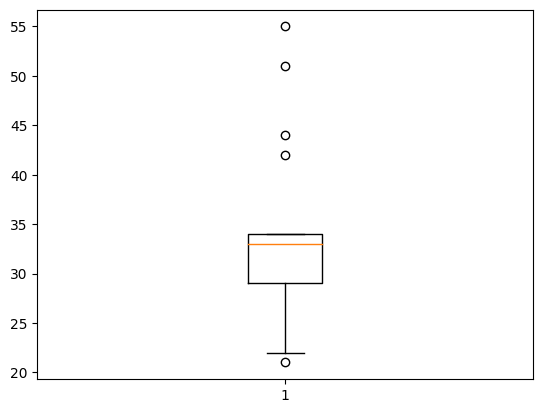

In [234]:
plt.boxplot(data.Age)

## Data Visualization

Bar plot: Age vs Salary

<BarContainer object of 17 artists>

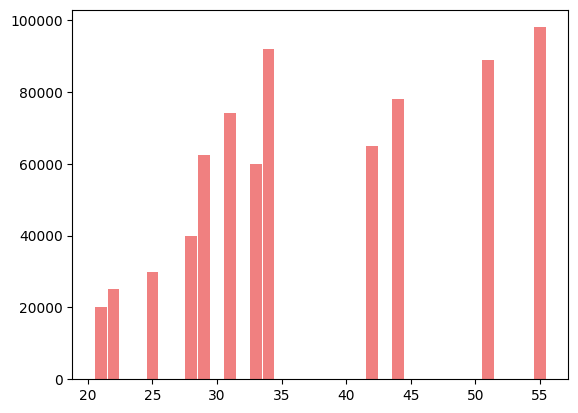

In [235]:
plt.bar(data['Age'], data['Salary'], color = 'lightcoral', width = 0.9)

Scatter Plot: Age vs Salary

<ipython-input-236-c8ecb545d17d>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Age'], data['Salary'], color = 'b', cmap = 'Accent')


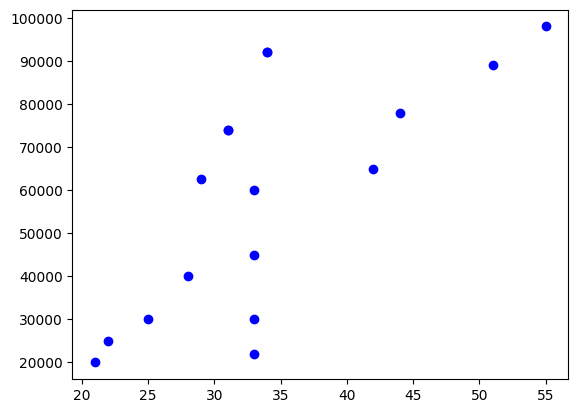

In [236]:
plt.scatter(data['Age'], data['Salary'], color = 'b', cmap = 'Accent')

Histogram

(array([2., 1., 4., 6., 0., 0., 2., 0., 1., 1.]),
 array([21. , 24.4, 27.8, 31.2, 34.6, 38. , 41.4, 44.8, 48.2, 51.6, 55. ]),
 <BarContainer object of 10 artists>)

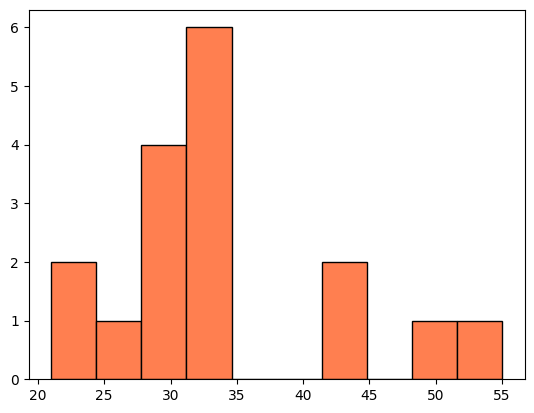

In [237]:
plt.hist(data.Age, color = 'coral', edgecolor = 'black')

(array([3., 2., 1., 1., 0., 3., 2., 1., 1., 3.]),
 array([20000., 27800., 35600., 43400., 51200., 59000., 66800., 74600.,
        82400., 90200., 98000.]),
 <BarContainer object of 10 artists>)

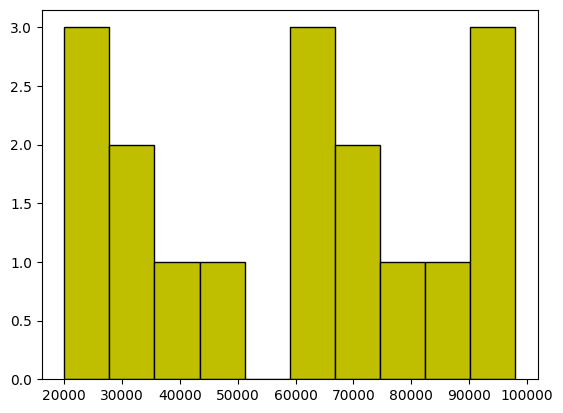

In [238]:
plt.hist(data.Salary, color = 'y', edgecolor = 'black')

## Feature Scaling

Min-Max Normalization

In [239]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
feature_cols = ['Age', 'Salary']
data[feature_cols] = min_max.fit_transform(data[feature_cols])

In [240]:
data

,Country,Age,Salary,Purchased,Category_Laptop,Category_Mobile,Category_Smart Watch
0,India,0.382353,0.923077,1,1,0,0
1,Sri lanka,0.029412,0.064103,1,0,0,1
2,China,0.294118,0.692308,1,1,0,0
3,Sri lanka,0.235294,0.544872,0,0,1,0
4,China,1.000000,1.000000,1,0,1,0
5,India,0.352941,0.128205,0,0,1,0
6,Sri lanka,0.205882,0.256410,0,1,0,0
7,India,0.352941,0.512821,0,0,1,0
8,China,0.882353,0.884615,1,1,0,0
9,India,0.676471,0.743590,1,1,0,0


StandardScaler

In [241]:
# from sklearn.preprocessing import StandardScaler

# # Select features to standardize
# feature_cols = ['Age', 'Salary']
# scaler = StandardScaler()
# data[feature_cols] = scaler.fit_transform(data[feature_cols])

In [242]:
# data

## Exporting Data using Pandas

In [244]:
data.to_csv('/content/Purchase_data_EDA.csv')